In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import seaborn as sns
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit,GridSearchCV,cross_val_score, KFold
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
# rmse
def regression_result(y_true,y_pred):
    mse=metrics.mean_squared_error(y_true, y_pred)
    rmse=round(np.sqrt(mse),4)
    return rmse
    
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score

rmse_score = make_scorer(rmse, greater_is_better = False)

In [9]:
df = pd.read_csv('DataML2.csv')
df['period'] = pd.to_datetime(df['period'], format= '%b-%y')

In [10]:
df.index.name = None

In [11]:
df = df.set_index('period')
df = df.drop(df.index[108])
df

,gdprl,csplrl,csprl,cslrl,csgrl,invrl,xgsrl,mgsrl,inhrl,inbrl,...,goog_groc,goog_parks,goog_transit,goog_work,goog_res,goog_avg,IPBK,IPAMM,ITP,IIK
period,,,,,,,,,,,,,,,,,,,,,
2012-01-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-01,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,19.656792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-01,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,19.656792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-3.485374,-4.001398,-4.046090,-1.967292,9.759699,-6.479756,-11.657055,-23.003171,-5.600000,-8.989116,...,-0.161290,-5.580645,-31.935484,-19.935484,10.258065,-10.322581,43.199396,33.786565,36.874311,32.240753
2020-09-01,-3.485374,-4.001398,-4.046090,-1.967292,9.759699,-6.479756,-11.657055,-23.003171,-5.600000,-8.989116,...,-2.333333,-10.366667,-36.000000,-18.866667,11.766667,-12.188889,37.466078,27.929502,32.982781,29.337052
2020-10-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,-4.708003,...,0.064516,-7.645161,-32.193548,-23.000000,9.774194,-11.833333,40.786587,34.514693,34.757150,31.410465


In [12]:
#gdprl	csplrl	csprl	cslrl	csgrl	invrl	xgsrl	mgsrl	inhrl	inbrl	retailsales
data = df.drop(columns=['onlinesales', 'onlinetranspr','konsumsiskn', 'IHPRsekunder', 'jalantolgol1', 'inflasipendidikan', 
                        'inflasikesehatan', 'devisa_transpor', 'devisa_travel', 'imporkonstruksi', 'orderbook', 
                        'voltraffgol3', 'voltraffgol5', 'presalesprop', 'voltraffgol4', 'goog_retail', 
                        'goog_groc', 'goog_parks', 'goog_transit', 'goog_work', 'goog_res', 
                        'goog_avg', 'IPBK', 'IPAMM', 'ITP', 'IIK', 'gdprl','csplrl',
                       'csprl','cslrl','csgrl','invrl','xgsrl','mgsrl','inhrl','retailsales'])
data

,inbrl,sukucadang,manminrok,bbm,gadget,perlengkapanrt,barangbudaya,baranglain,barangsandang,mobilsales,...,rtgs,prod_motor,ekspor_nm_rl,impor_nm_rl,ekspor_nm_pi,impor_nm_pi,ekspor_mg_nl,impor_mg_nl,sup_valas_jl,sup_valas_bl
period,,,,,,,,,,,,,,,,,,,,,
2012-01-01,11.224086,95.462254,116.436824,102.782781,125.647975,131.069978,97.748775,111.269651,122.355941,76427,...,1140089.390,76188,10723.58466,12242.559210,114.919980,93.455990,3142.633968,3019.327583,22442499.63,24912810.16
2012-02-01,11.224086,86.876906,108.690942,97.354248,125.245195,130.186828,101.825121,102.109056,110.749180,86486,...,1156648.290,85747,10887.07557,12490.456360,114.851202,94.569651,3355.479572,3492.652399,21664503.45,23836369.39
2012-03-01,11.224086,93.026262,116.452079,101.673305,120.550990,130.424904,105.193351,106.808437,114.664600,87917,...,1206328.900,85097,11523.35706,12946.806280,116.810881,94.238671,3486.095481,4008.890181,20912505.05,22648459.89
2012-04-01,19.656792,86.914016,114.365660,102.643388,118.729045,131.977762,102.909736,105.629696,112.962527,87144,...,1172728.360,83721,10792.98152,12948.428110,116.763896,94.778955,3560.730493,4120.395283,20284957.19,20772381.34
2012-05-01,19.656792,93.110160,117.775489,96.640337,115.126069,137.719549,103.730032,114.997415,123.943550,95541,...,1346689.120,90869,11388.35403,14052.304160,116.015932,94.502227,3724.886311,3442.100000,21893002.43,26047380.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-8.989116,118.228910,238.195283,65.447093,250.935422,138.497428,66.966929,79.522759,62.685797,37277,...,2026929.250,29584,10521.42765,9794.608347,118.571234,100.441673,598.700000,949.800000,24880135.45,23809095.74
2020-09-01,-8.989116,118.658436,235.330999,67.500583,241.236428,135.682770,64.429920,79.261946,64.796720,48554,...,2346047.680,59573,11142.52793,10292.517290,119.598267,101.134059,668.400000,1173.000000,26695283.37,26237659.74
2020-10-01,-4.708003,118.706834,222.743949,71.029015,212.706197,132.480744,65.040389,77.731932,66.348474,49018,...,2163810.000,66378,11447.17000,9458.295633,120.325798,102.814970,613.400000,1078.800000,24700714.17,23894242.42


In [13]:
data = data[['inbrl','IKE', 'motorsales', 'prod_motor', 'JobVacancy', 'baranglain', 'ekspor_mg_nl', 'pmi', 'impor_nm_rl', 
             'salesalatberat']]
data

,inbrl,IKE,motorsales,prod_motor,JobVacancy,baranglain,ekspor_mg_nl,pmi,impor_nm_rl,salesalatberat
period,,,,,,,,,,
2012-01-01,11.224086,110.900000,645863,76188,88.262366,111.269651,3142.633968,48.49,12242.559210,617.0
2012-02-01,11.224086,103.500000,666136,85747,100.000000,102.109056,3355.479572,50.63,12490.456360,769.0
2012-03-01,11.224086,102.400000,619678,85097,106.761206,106.808437,3486.095481,50.82,12946.806280,821.0
2012-04-01,19.656792,97.600000,617508,83721,98.364888,105.629696,3560.730493,50.46,12948.428110,749.0
2012-05-01,19.656792,103.800000,611251,90869,100.007483,114.997415,3724.886311,48.04,14052.304160,773.0
...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-8.989116,55.599832,317107,29584,40.063983,79.522759,598.700000,50.80,9794.608347,105.0
2020-09-01,-8.989116,54.135689,380713,59573,38.430742,79.261946,668.400000,47.20,10292.517290,148.0
2020-10-01,-4.708003,51.463568,317830,66378,36.602933,77.731932,613.400000,47.80,9458.295633,154.0


In [16]:
data = data.dropna()
data

,inbrl,IKE,motorsales,prod_motor,JobVacancy,baranglain,ekspor_mg_nl,pmi,impor_nm_rl,salesalatberat
period,,,,,,,,,,
2012-01-01,11.224086,110.900000,645863,76188,88.262366,111.269651,3142.633968,48.49,12242.559210,617.0
2012-02-01,11.224086,103.500000,666136,85747,100.000000,102.109056,3355.479572,50.63,12490.456360,769.0
2012-03-01,11.224086,102.400000,619678,85097,106.761206,106.808437,3486.095481,50.82,12946.806280,821.0
2012-04-01,19.656792,97.600000,617508,83721,98.364888,105.629696,3560.730493,50.46,12948.428110,749.0
2012-05-01,19.656792,103.800000,611251,90869,100.007483,114.997415,3724.886311,48.04,14052.304160,773.0
...,...,...,...,...,...,...,...,...,...,...
2020-07-01,-8.989116,50.663358,292205,24413,35.356956,77.740867,679.100000,46.90,9396.042999,85.0
2020-08-01,-8.989116,55.599832,317107,29584,40.063983,79.522759,598.700000,50.80,9794.608347,105.0
2020-09-01,-8.989116,54.135689,380713,59573,38.430742,79.261946,668.400000,47.20,10292.517290,148.0


In [17]:
scaler = StandardScaler()
scaler = scaler.fit_transform(data.values)
scaler

array([[ 1.19405022,  0.49491625,  0.8824589 , ..., -0.24389608,
         0.54059473,  2.15364207],
       [ 1.19405022,  0.01310275,  1.04423952, ...,  0.37102711,
         0.70967145,  3.16294459],
       [ 1.19405022, -0.05851818,  0.67349992, ...,  0.42562309,
         1.0209221 ,  3.50823229],
       ...,
       [-1.83735515, -3.20100425, -1.23346528, ..., -0.61457407,
        -0.78941931, -0.96058741],
       [-1.19531   , -3.37498588, -1.73527806, ..., -0.4421657 ,
        -1.35839503, -0.92074652],
       [-1.19531   , -2.80992806, -2.38003044, ...,  0.36240669,
        -0.26666958, -1.04026919]])

In [18]:
data = pd.DataFrame(scaler, columns = data.columns, index = data.index)
data

,inbrl,IKE,motorsales,prod_motor,JobVacancy,baranglain,ekspor_mg_nl,pmi,impor_nm_rl,salesalatberat
period,,,,,,,,,,
2012-01-01,1.194050,0.494916,0.882459,-0.879790,-0.224866,-1.051416,1.729776,-0.243896,0.540595,2.153642
2012-02-01,1.194050,0.013103,1.044240,-0.461810,0.212787,-1.289077,1.988129,0.371027,0.709671,3.162945
2012-03-01,1.194050,-0.058518,0.673500,-0.490232,0.464888,-1.167157,2.146671,0.425623,1.020922,3.508232
2012-04-01,2.458716,-0.371046,0.656183,-0.550400,0.151820,-1.197738,2.237263,0.322178,1.022028,3.030142
2012-05-01,2.458716,0.032636,0.606252,-0.237844,0.213066,-0.954703,2.436516,-0.373202,1.774920,3.189505
...,...,...,...,...,...,...,...,...,...,...
2020-07-01,-1.837355,-3.427087,-1.939768,-3.143717,-2.197514,-1.921282,-1.260467,-0.700778,-1.400854,-1.378917
2020-08-01,-1.837355,-3.105674,-1.741048,-2.917609,-2.022007,-1.875053,-1.358057,0.419876,-1.129015,-1.246114
2020-09-01,-1.837355,-3.201004,-1.233465,-1.606302,-2.082904,-1.881820,-1.273455,-0.614574,-0.789419,-0.960587


In [19]:
data = data.fillna(method = 'pad')

In [21]:
data

,inbrl,IKE,motorsales,prod_motor,JobVacancy,baranglain,ekspor_mg_nl,pmi,impor_nm_rl,salesalatberat
period,,,,,,,,,,
2012-01-01,1.194050,0.494916,0.882459,-0.879790,-0.224866,-1.051416,1.729776,-0.243896,0.540595,2.153642
2012-02-01,1.194050,0.013103,1.044240,-0.461810,0.212787,-1.289077,1.988129,0.371027,0.709671,3.162945
2012-03-01,1.194050,-0.058518,0.673500,-0.490232,0.464888,-1.167157,2.146671,0.425623,1.020922,3.508232
2012-04-01,2.458716,-0.371046,0.656183,-0.550400,0.151820,-1.197738,2.237263,0.322178,1.022028,3.030142
2012-05-01,2.458716,0.032636,0.606252,-0.237844,0.213066,-0.954703,2.436516,-0.373202,1.774920,3.189505
...,...,...,...,...,...,...,...,...,...,...
2020-07-01,-1.837355,-3.427087,-1.939768,-3.143717,-2.197514,-1.921282,-1.260467,-0.700778,-1.400854,-1.378917
2020-08-01,-1.837355,-3.105674,-1.741048,-2.917609,-2.022007,-1.875053,-1.358057,0.419876,-1.129015,-1.246114
2020-09-01,-1.837355,-3.201004,-1.233465,-1.606302,-2.082904,-1.881820,-1.273455,-0.614574,-0.789419,-0.960587


Text(0.5, 1.0, 'inbrl')

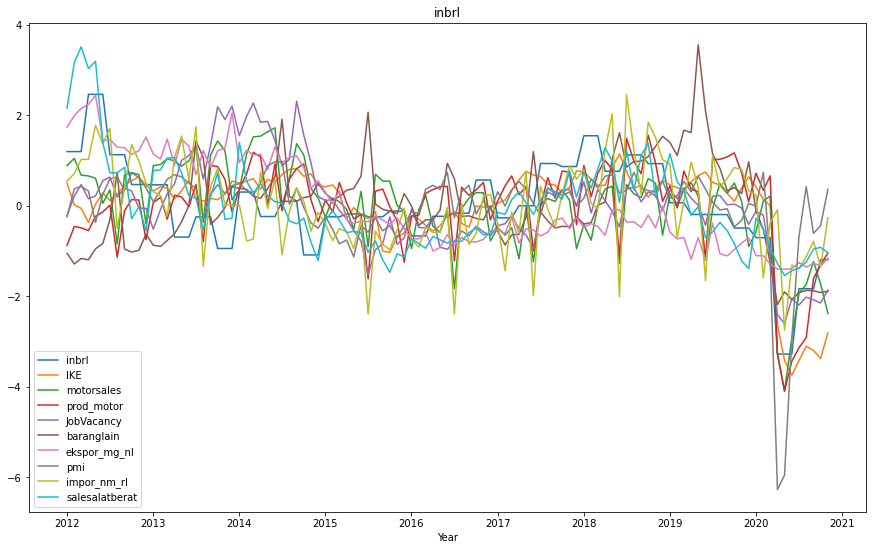

In [34]:
fig, ax = plt.subplots(figsize = (15,9))
col = data.columns
for i in data.columns:
    ax.plot(data[i],label=i)
ax.legend()
ax.set_xlabel('Year')
ax.set_title('inbrl')

In [22]:
x_train = data[:'2020-06-01'].drop(['inbrl'], axis = 1)
y_train = data.loc[:'2020-06-01', 'inbrl']
x_test = data['2020-07-01':'2020-12-01'].drop(['inbrl'], axis = 1)
y_test = data.loc['2020-07-01':'2020-12-01', 'inbrl']

In [23]:
trans = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_train_poly = trans.fit_transform(x_train)
x_test_poly = trans.fit_transform(x_test)

In [24]:
column_xtrain = trans.get_feature_names(x_train.columns)
column_xtest = trans.get_feature_names(x_test.columns)

In [25]:
x_train_model = pd.DataFrame(x_train_poly, columns = column_xtrain, index = x_train.index)
x_test_model = pd.DataFrame(x_test_poly, columns = column_xtest, index = x_test.index)
tscv = TimeSeriesSplit(n_splits=11)

In [27]:
pipe_elastic = Pipeline([('elastic', ElasticNet())])

rmse training =  0.4956376925791855 
rmse testing =  1.098419868260175


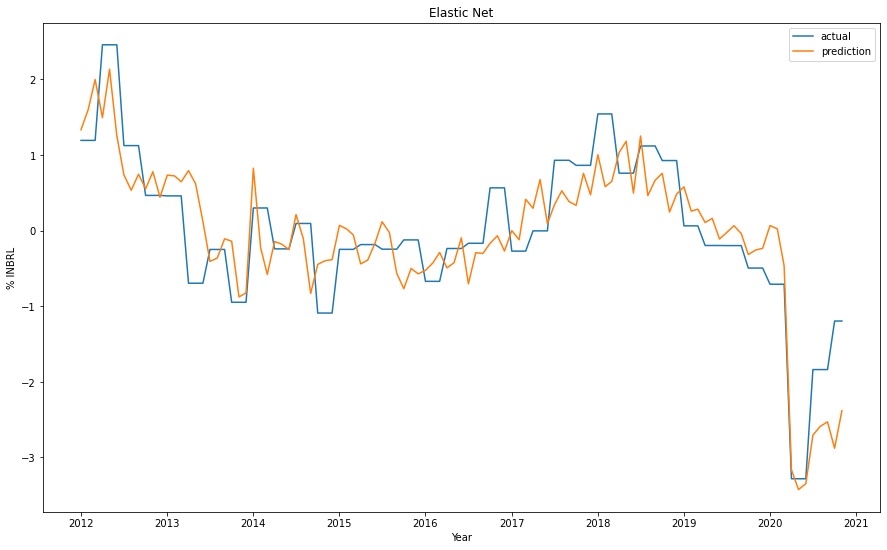

In [28]:
elnet = ElasticNet(alpha=0.01, l1_ratio=0.4, tol=0.6)
elnet_train = elnet.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_elnet = np.concatenate((elnet_train.predict(x_train_model),elnet_train.predict(x_test_model)))
yact_elnet = np.concatenate((y_train.values, y_test.values))

# plotting
df_elnet = pd.DataFrame(
    {'period': data.index, 'actual': yact_elnet, 'prediction': ypred_elnet})
df_elnet.index = df_elnet['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_elnet['actual'],label='actual')
ax.plot(df_elnet['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% INBRL')
ax.set_title('Elastic Net')

#rmse
rmse_elnet_train = rmse(elnet_train.predict(x_train_model), y_train.values)
rmse_elnet_test = rmse(elnet_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_elnet_train, 
      '\nrmse testing = ',
      rmse_elnet_test)

rmse training =  0.5717881747442235 
rmse testing =  0.6394093914161394


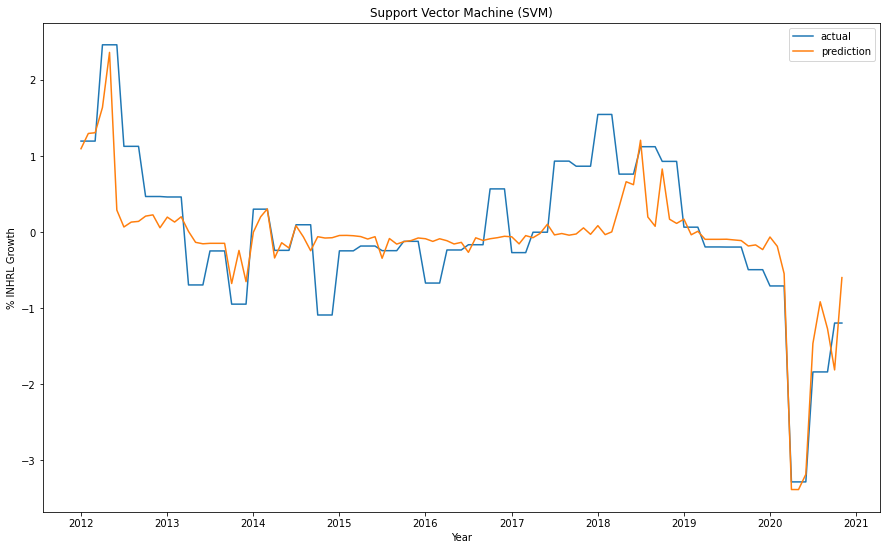

In [29]:
pipe_svr = Pipeline([('svr', SVR())])
# model running
svm = SVR(degree=2, gamma='auto', kernel='poly')
svm_train = svm.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_svm = np.concatenate((svm_train.predict(x_train_model),svm_train.predict(x_test_model)))
yact_svm = np.concatenate((y_train.values, y_test.values))

df_svm = pd.DataFrame(
    {'period': data.index, 'actual': yact_svm, 'prediction': ypred_svm})
df_svm.index = df_svm['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_svm['actual'],label='actual')
ax.plot(df_svm['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% INHRL Growth')
ax.set_title('Support Vector Machine (SVM)')

#rmse
rmse_svm_train = rmse(svm_train.predict(x_train_model), y_train.values)
rmse_svm_test = rmse(svm_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_svm_train, 
      '\nrmse testing = ',
      rmse_svm_test)

In [30]:
xgb = XGBRegressor()
pipe_xgb = Pipeline([('xgb', xgb)])

rmse training =  0.17344427483436547 
rmse testing =  0.6614279295599118


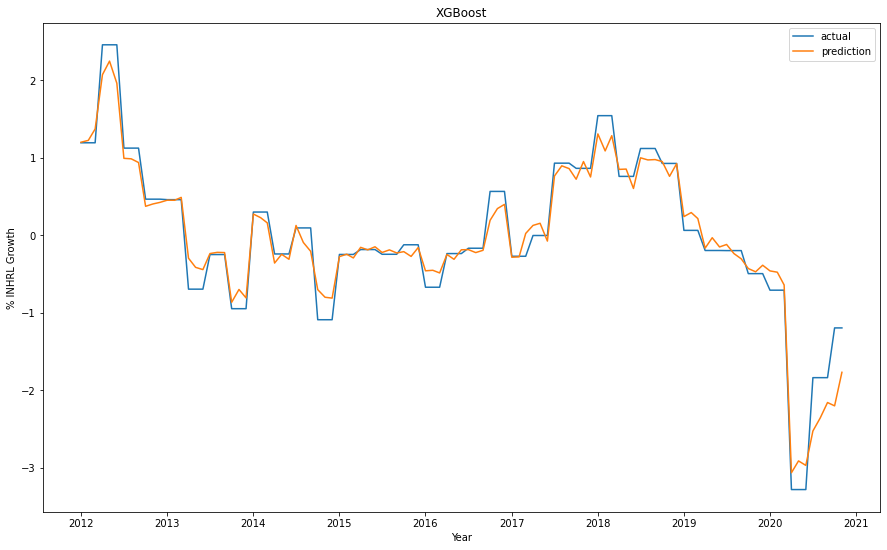

In [31]:
xg = XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.6, eta=0.05, gamma=0.3,
                              gpu_id=-1, importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.0500000007, max_delta_step=0,
                              max_depth=100, min_child_weight=1,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=0.8, tree_method='exact',
                              validate_parameters=1, verbosity=None)
xg_train = xg.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_xg = np.concatenate((xg_train.predict(x_train_model),xg_train.predict(x_test_model)))
yact_xg = np.concatenate((y_train.values, y_test.values))

df_xg = pd.DataFrame(
    {'period': data.index, 'actual': yact_xg, 'prediction': ypred_xg})
df_xg.index = df_xg['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_xg['actual'],label='actual')
ax.plot(df_xg['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% INHRL Growth')
ax.set_title('XGBoost')

#rmse
rmse_xg_train = rmse(xg_train.predict(x_train_model), y_train.values)
rmse_xg_test = rmse(xg_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_xg_train, 
      '\nrmse testing = ',
      rmse_xg_test)

rmse training =  0.22560774580210807 
rmse testing =  0.6606857505925221


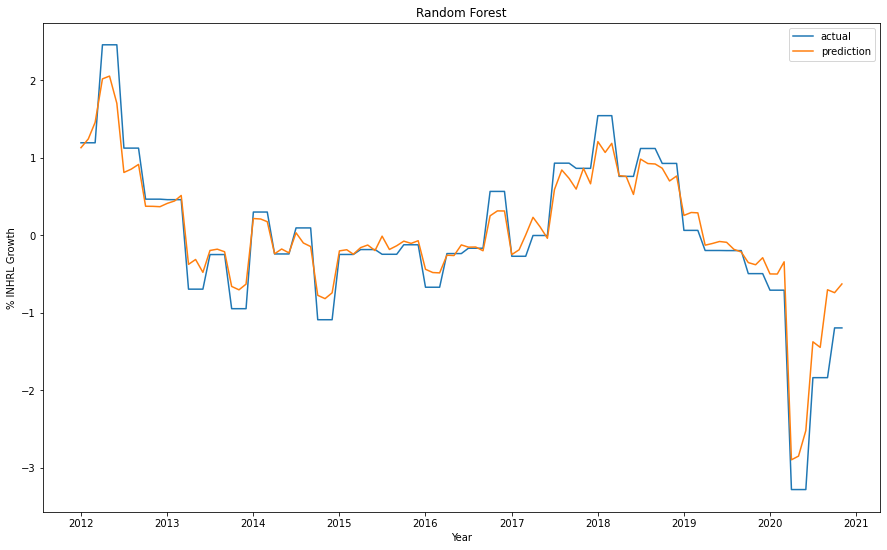

In [32]:
# model running
rf = RandomForestRegressor(max_depth=300, max_features='sqrt',
                                       n_estimators=200)
rf_train = rf.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_rf = np.concatenate((rf_train.predict(x_train_model),rf_train.predict(x_test_model)))
yact_rf = np.concatenate((y_train.values, y_test.values))

# plotting
df_rf = pd.DataFrame(
    {'period': data.index, 'actual': yact_rf, 'prediction': ypred_rf})
df_rf.index = df_rf['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_rf['actual'],label='actual')
ax.plot(df_rf['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% INHRL Growth')
ax.set_title('Random Forest')

#rmse
rmse_rf_train = rmse(rf_train.predict(x_train_model), y_train.values)
rmse_rf_test = rmse(rf_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_rf_train, 
      '\nrmse testing = ',
      rmse_rf_test)

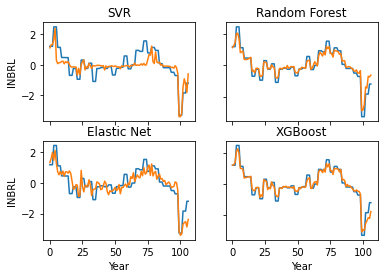

In [35]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(yact_svm)
axs[0, 0].plot(ypred_svm)
axs[0, 0].set_title('SVR')
axs[0, 1].plot(yact_rf)
axs[0, 1].plot(ypred_rf)
axs[0, 1].set_title('Random Forest')
axs[1, 0].plot(yact_elnet)
axs[1, 0].plot(ypred_elnet)
axs[1, 0].set_title('Elastic Net')
axs[1, 1].plot(yact_xg)
axs[1, 1].plot(ypred_xg)
axs[1, 1].set_title('XGBoost')

for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='INBRL')
    
for ax in axs.flat:
    ax.label_outer()

In [8]:
data = data[data.columns].pct_change(periods=12)
data = data.dropna()
data

,inbrl,IKE,motorsales,prod_motor,JobVacancy,baranglain,ekspor_mg_nl,pmi,impor_nm_rl,salesalatberat
period,,,,,,,,,,
2013-01-01,-0.436028,-0.023058,0.000339,0.284257,-0.090021,0.061211,-0.155596,0.023922,-0.027288,-0.337115
2013-02-01,-0.436028,0.059804,-0.025073,0.172939,-0.078388,0.146434,-0.234818,-0.002765,-0.058174,-0.464239
2013-03-01,-0.436028,0.067323,0.073677,0.051412,-0.051484,0.143282,-0.160012,0.010626,-0.142271,-0.450670
2013-04-01,-1.069818,0.081794,0.066663,0.213292,0.090095,0.209732,-0.311387,0.024970,0.004843,-0.395194
2013-05-01,-1.069818,0.043888,0.054670,0.107925,0.211501,0.200872,-0.214406,0.073064,-0.024623,-0.481242
...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-5.619057,-0.495781,-0.468732,-0.752865,-0.600697,-0.566783,-0.289714,0.036735,-0.187531,-0.556962
2020-09-01,-5.619057,-0.496362,-0.331488,-0.507490,-0.594184,-0.517982,-0.167621,-0.038697,-0.165281,-0.291866
2020-10-01,129.554946,-0.508702,-0.468493,-0.460201,-0.615664,-0.535138,-0.330422,0.002096,-0.254212,-0.072289


In [14]:
data2 = data[data.columns].pct_change(periods=12)
data2

,inbrl,IKE,motorsales,prod_motor,JobVacancy,baranglain,ekspor_mg_nl,pmi,impor_nm_rl,salesalatberat
period,,,,,,,,,,
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-5.619057,-0.495781,-0.468732,-0.752865,-0.600697,-0.566783,-0.289714,0.036735,-0.187531,-0.556962
2020-09-01,-5.619057,-0.496362,-0.331488,-0.507490,-0.594184,-0.517982,-0.167621,-0.038697,-0.165281,-0.291866
2020-10-01,129.554946,-0.508702,-0.468493,-0.460201,-0.615664,-0.535138,-0.330422,0.002096,-0.254212,-0.072289
